Upload your file: 


Saving archive (2).zip to archive (2) (4).zip
Files extracted:
['stations.csv', 'station_day.csv', 'city_day.csv', 'station_hour.csv', 'city_hour.csv']


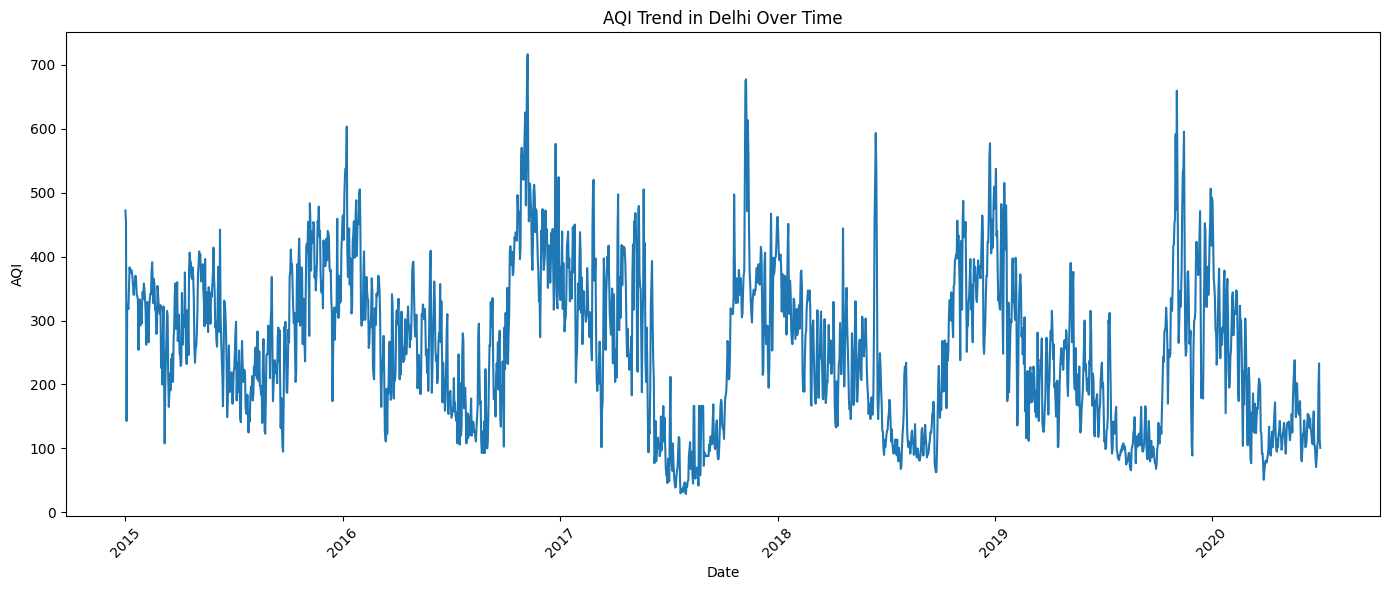

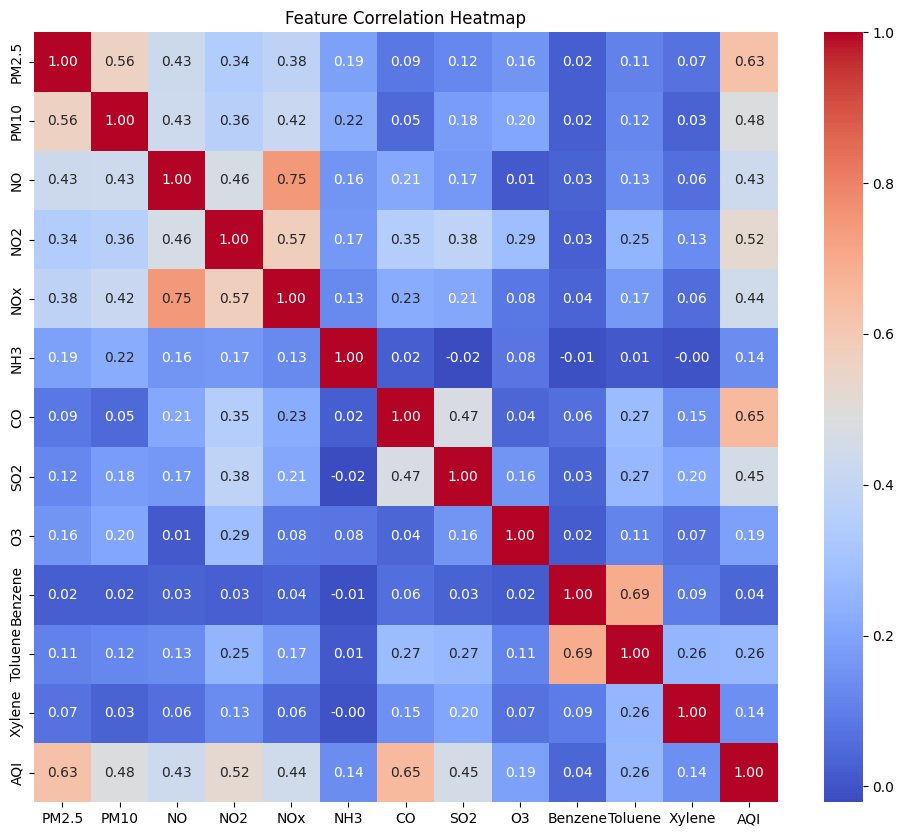

In [11]:
# STEP 1: Upload and extract ZIP file
from google.colab import files
import zipfile
import os
import pandas as pd

print("Upload your file: ")
uploaded = files.upload()

# Extract ZIP
zip_filename = list(uploaded.keys())[0]
extract_path = "aqi_data"

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted:")
print(os.listdir(extract_path))

# STEP 2: Load city_day.csv and preprocess
df = pd.read_csv(f"{extract_path}/city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()

# STEP 3: Check and fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# STEP 4: AQI Trend Visualization (for Delhi)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=df[df['City'] == 'Delhi'], x='Date', y='AQI')
plt.title('AQI Trend in Delhi Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# STEP 5: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# STEP 6: Prepare for ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

features = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
target = df['AQI']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



